Shynar Bolatova 23884

In [2]:
import pandas as pd
import numpy as np

## Book Database

In [60]:
dataset = pd.read_csv("Books.csv")
dataset.head()

Publishing Year                        Book Name  \
0           1975.0                          Beowulf   
1           1987.0                 Batman: Year One   
2           2015.0                Go Set a Watchman   
3           2008.0  When You Are Engulfed in Flames   
4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267  genre fiction   
2        Novice                 3.31              138669  genre fiction   
3  Intermediate                 4.04              150898        fiction   
4  Intermediate                 4.04              198283  genre fiction   

   gross sales  publisher revenue  sale price  sales rank  \
0      34160.0            20496.0        4.88           1   
1      12437.5             7462.5        1.99           2   
2      47795.0            28677.0        8.69           3   
3      41250.0            24750.0        7.50           3   
4      37952.5            22771.5        7.99           4   

                       Publisher   units sold  
0        HarperCollins Publishers        7000  
1        HarperCollins Publishers        6250  
2  Amazon Digital Services,  Inc.        5500  
3             Hachette Book Group        5500  
4         Penguin Group (USA) LLC        4750

#### Database Size:

In [61]:
nRows, nCols = dataset.shape
print(f'There are {nRows} rows and {nCols} columns')

There are 1070 rows and 14 columns


In [62]:
#dataset.info()

#### Book Properties:

In [63]:
dataset.columns

Index(['Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

#### Column types:

In [64]:
dataset.dtypes

Publishing Year        float64
Book Name               object
Author                  object
language_code           object
Author_Rating           object
Book_average_rating    float64
Book_ratings_count       int64
genre                   object
gross sales            float64
publisher revenue      float64
sale price             float64
sales rank               int64
Publisher               object
units sold               int64
dtype: object

## DATA PREPROCESSING

In [65]:
dataset['Book Name'].isnull().value_counts()

False    1047
True       23
Name: Book Name, dtype: int64

#### Getting rid of null values:

In [66]:
dataset = dataset.dropna()
dataset.shape

(998, 14)

#### Renaming columns:

In [67]:
dataset.rename(columns = {"Publishing Year":"Year","Book Name":"Name","language_code":"Lang",
                          "Publisher ":"Publisher"}, inplace = True)

#### Rounding year column values

In [68]:
dataset.Year = dataset.Year.astype(int)
dataset.Year.dtype

dtype('int32')

## DATA ANALYSIS

#### What are the main statistical сalculations?

In [69]:
dataset.describe()

Year  Book_average_rating  Book_ratings_count  gross sales  \
count   998.000000           998.000000          998.000000    998.00000   
mean   1971.070140             4.003056        95500.622244   1885.08515   
std     190.019592             0.247360        31650.845116   4023.26877   
min    -560.000000             2.970000        27308.000000    104.94000   
25%    1985.000000             3.850000        70946.500000    370.88250   
50%    2003.000000             4.010000        89901.000000    806.25000   
75%    2010.000000             4.170000       115596.000000   1492.96500   
max    2016.000000             4.770000       206792.000000  47795.00000   

       publisher revenue  sale price   sales rank    units sold  
count         998.000000  998.000000   998.000000    998.000000  
mean          848.897952    4.839649   605.750501   9802.312625  
std          2303.504061    3.585046   369.174705  15503.088302  
min             0.000000    0.990000     1.000000    106.000000  
25%             0.000000    1.990000   283.000000    555.000000  
50%           260.619000    3.990000   591.500000   3915.000000  
75%           721.180500    6.990000   919.500000   5420.250000  
max         28677.000000   33.860000  1273.000000  61560.000000

#### What are the correlation between columns in this dataset?        (correlation rate)

In [70]:
corr = dataset.loc[:].corr()
corr

Year  Book_average_rating  Book_ratings_count  \
Year                 1.000000             0.057525           -0.000284   
Book_average_rating  0.057525             1.000000            0.099659   
Book_ratings_count  -0.000284             0.099659            1.000000   
gross sales          0.007352            -0.050138            0.498865   
publisher revenue    0.006247            -0.054237            0.396267   
sale price           0.027647            -0.013554           -0.073152   
sales rank           0.016711            -0.030431           -0.834705   
units sold          -0.016393            -0.000270           -0.259968   

                     gross sales  publisher revenue  sale price  sales rank  \
Year                    0.007352           0.006247    0.027647    0.016711   
Book_average_rating    -0.050138          -0.054237   -0.013554   -0.030431   
Book_ratings_count      0.498865           0.396267   -0.073152   -0.834705   
gross sales             1.000000           0.911125    0.270742   -0.440192   
publisher revenue       0.911125           1.000000    0.310049   -0.336351   
sale price              0.270742           0.310049    1.000000    0.078373   
sales rank             -0.440192          -0.336351    0.078373    1.000000   
units sold             -0.152192          -0.116363   -0.000943    0.221921   

                     units sold  
Year                  -0.016393  
Book_average_rating   -0.000270  
Book_ratings_count    -0.259968  
gross sales           -0.152192  
publisher revenue     -0.116363  
sale price            -0.000943  
sales rank             0.221921  
units sold             1.000000

## VISUALIZATION

#### I visualized the correlations using matplotlib:

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

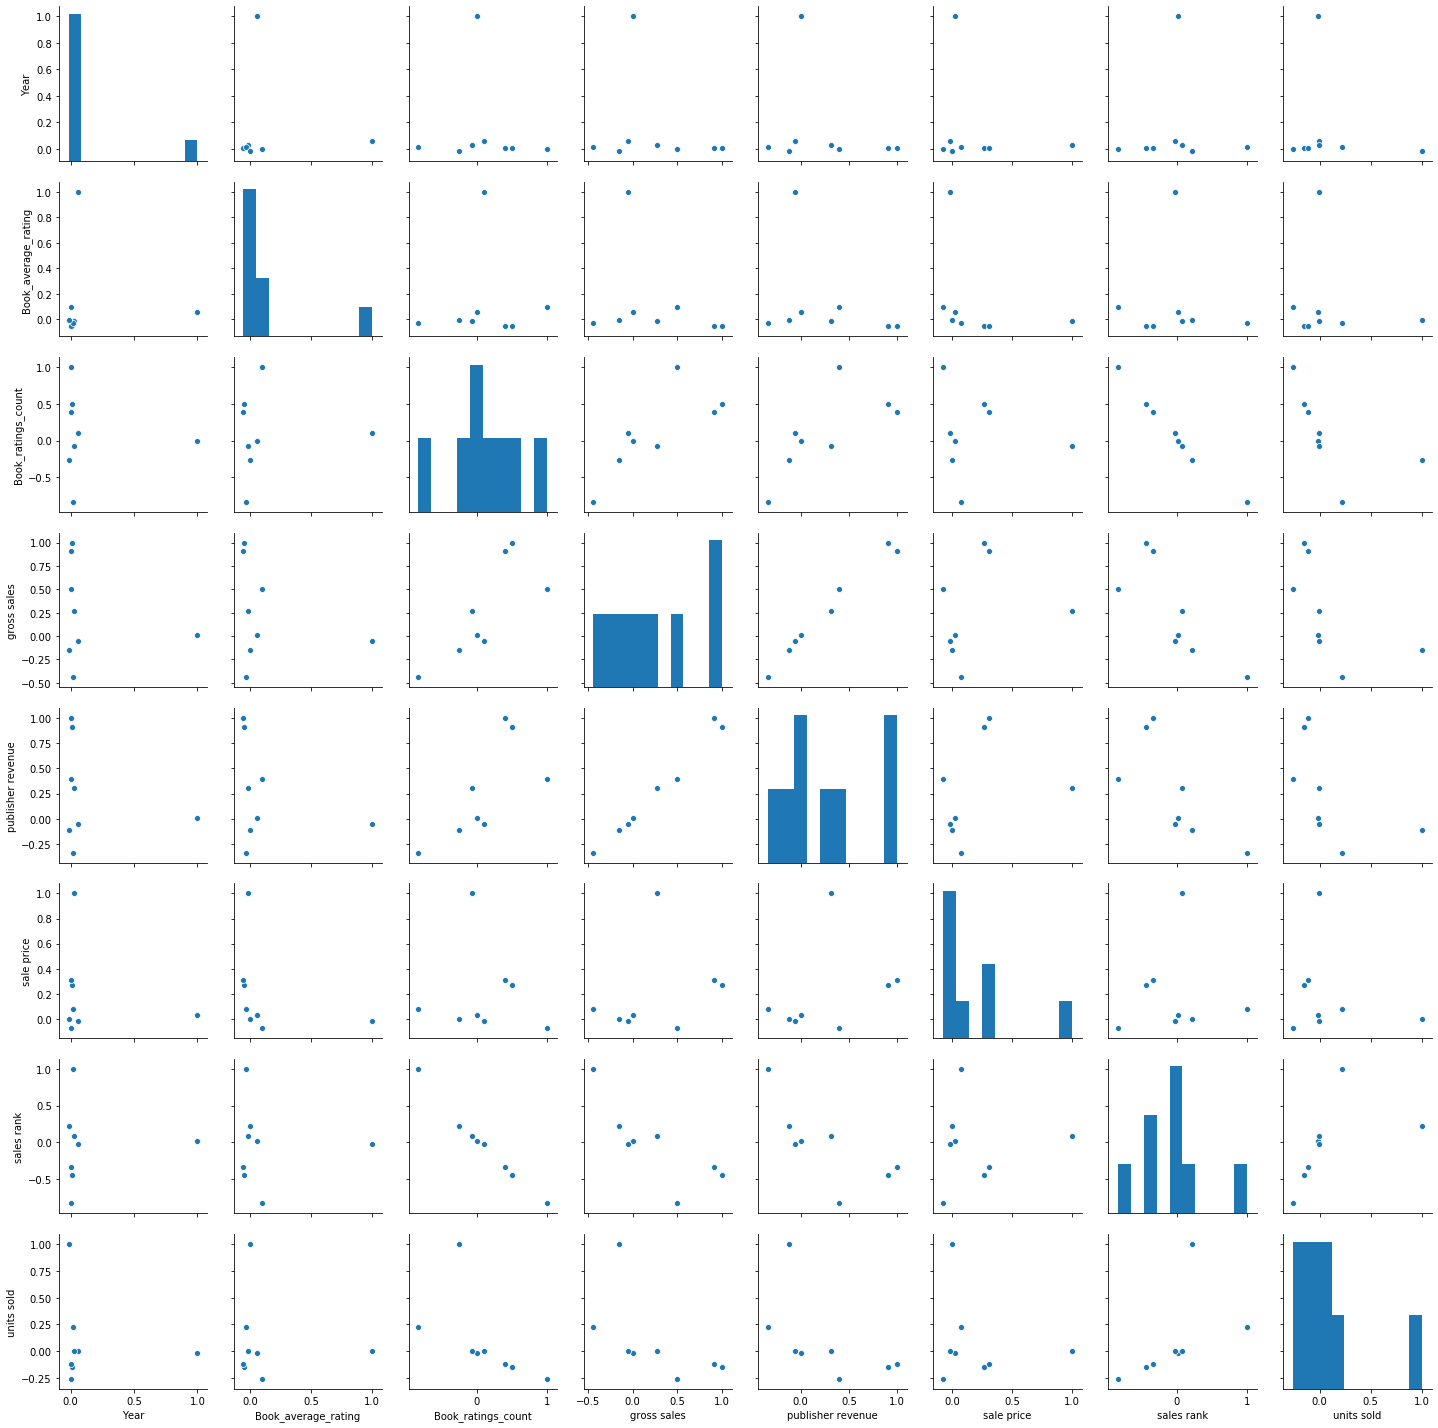

In [15]:
sns.pairplot(corr)
plt.show()

#### Better visualization:

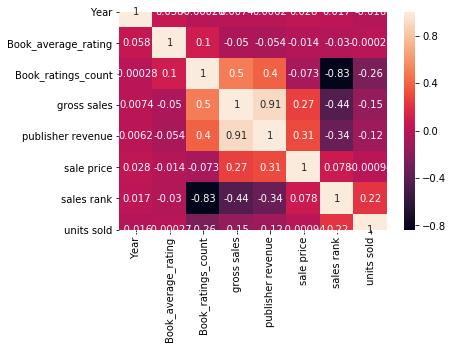

In [16]:
sns.heatmap(corr, annot = True)
plt.show()

#### Who are the publishers in this dataset?

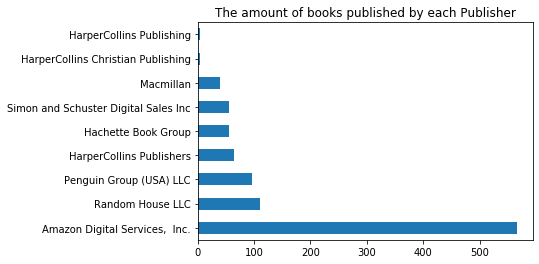

In [17]:
publishers = dataset['Publisher'].value_counts(normalize=False)
publishers.plot(kind='barh', title="The amount of books published by each Publisher")
plt.show()

#### What about book languages?

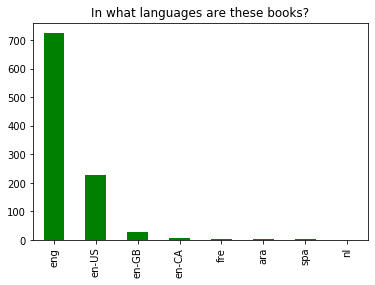

In [18]:
langs = dataset.Lang.value_counts(normalize=False)
langs.plot.bar(title="In what languages are these books?", color='g')

#### The amount of books by genre:

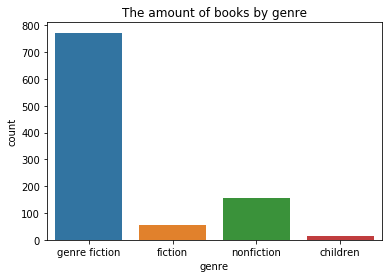

In [19]:
sns.countplot(dataset.genre)
plt.title('The amount of books by genre')
plt.show()

#### The ratio between the author ratings:

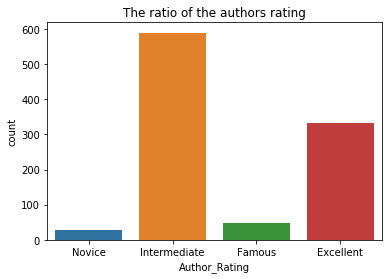

In [20]:
sns.countplot(dataset['Author_Rating'])
plt.title("The ratio of the authors rating")
plt.show()

#### How many books was written by each athor? Who had wrote the greatest amount of book?

In [21]:
year_counts = dataset.Author.value_counts(normalize=False)
print(year_counts)
# year_counts = year_counts/year_counts.sum()
# while (year_counts != 1):
#     year_counts.plot.bar(title="In what languages are these books?", color='g')

Stephen King                                  27
Charlaine Harris                              10
Jim Butcher                                   10
Nicholas Sparks                               10
Jodi Picoult                                   9
                                              ..
Stephen King, Bernie Wrightson                 1
Stephen King, John D. MacDonald                1
Elizabeth Strout                               1
Francis Chan, Danae Yankoski, Chris Tomlin     1
Angie Sage                                     1
Name: Author, Length: 698, dtype: int64


#### The amount of books per year:

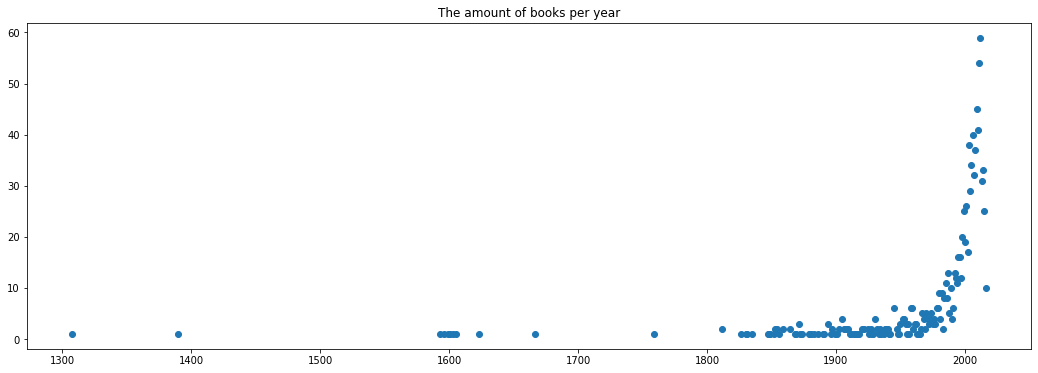

In [22]:
dataset[dataset.Year > 0].Year.value_counts(ascending=True)
# sns.countplot(years)

plt.figure(figsize=(18,6))
plt.scatter(dataset[dataset.Year > 0]['Year'].value_counts().index, dataset[dataset.Year > 1000]['Year'].value_counts())
plt.title('The amount of books per year')
plt.show()
# sns.countplot(dataset[dataset.Year > 1000]['Year'])
# plt.xticks(rotation=90)
# plt.show()

#### The best seller book is:

In [23]:
bestseller = dataset[dataset["units sold"] == dataset["units sold"].max()]
print("\nBESTSELLER")
bestseller = bestseller.drop(["Book_ratings_count","gross sales","publisher revenue","sales rank","units sold"], axis=1)
bestseller


BESTSELLER


Year                                               Name          Author  \
578  2009  New Moon: The Complete Illustrated Movie Compa...  Mark Cotta Vaz   

      Lang Author_Rating  Book_average_rating          genre  sale price  \
578  en-US     Excellent                 4.34  genre fiction       10.99   

                   Publisher  
578  Penguin Group (USA) LLC

#### The 5 top rated books are ..

In [24]:
# dataset[dataset["Book_average_rating"] == dataset["Book_average_rating"].max()]
df = dataset.sort_values('Book_average_rating',ascending=False)
df[["Name","Author","Publisher","Year","Lang","genre"]].head(5)

Name  \
331                                  Words of Radiance   
777                           A Court of Mist and Fury   
479  The Essential Calvin and Hobbes: A Calvin and ...   
31                                    The Way of Kings   
249                                  Calvin and Hobbes   

                           Author                             Publisher  Year  \
331             Brandon Sanderson              HarperCollins Publishers  2014   
777                 Sarah J. Maas  Simon and Schuster Digital Sales Inc  2016   
479                Bill Watterson        Amazon Digital Services,  Inc.  1988   
31              Brandon Sanderson        Amazon Digital Services,  Inc.  2010   
249  Bill Watterson, G.B. Trudeau               Penguin Group (USA) LLC  1987   

      Lang          genre  
331    eng  genre fiction  
777    eng  genre fiction  
479  en-US  genre fiction  
31     eng  genre fiction  
249  en-US     nonfiction

In [25]:
# dataset.sample(3)

## CLASSIFICATION ALGORITHMS

#### I dropped unnecessary columns and left those I'll need further 

In [129]:
new_ds = dataset.drop(['Author','Lang','Author_Rating','sale price','Publisher','Year'],axis=1)
new_ds.head()

Name  Book_average_rating  Book_ratings_count  \
0                          Beowulf                 3.42              155903   
1                 Batman: Year One                 4.23              145267   
2                Go Set a Watchman                 3.31              138669   
3  When You Are Engulfed in Flames                 4.04              150898   
4         Daughter of Smoke & Bone                 4.04              198283   

           genre  gross sales  publisher revenue  sales rank  units sold  
0  genre fiction      34160.0            20496.0           1        7000  
1  genre fiction      12437.5             7462.5           2        6250  
2  genre fiction      47795.0            28677.0           3        5500  
3        fiction      41250.0            24750.0           3        5500  
4  genre fiction      37952.5            22771.5           4        4750

#### Data Preprocessing

In [130]:
new_ds.genre.unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [131]:
new_ds.insert(0, "id", new_ds.index.values, True)
new_ds.sample(2)

id                                               Name  \
149  149                                Think and Grow Rich   
392  392  The Alchemyst: The Secrets of The Immortal Nic...   

     Book_average_rating  Book_ratings_count          genre  gross sales  \
149                 4.17               87445  genre fiction       702.90   
392                 3.84               58396  genre fiction      1693.88   

     publisher revenue  sales rank  units sold  
149              0.000         158         710  
392           1016.328         425        5724

In [132]:
new_ds["genre"]= new_ds["genre"].replace("genre fiction", "1") 
new_ds["genre"]= new_ds["genre"].replace("fiction", "2") 
new_ds["genre"]= new_ds["genre"].replace("nonfiction", "3") 
new_ds["genre"]= new_ds["genre"].replace("children", "4") 

In [133]:
x=new_ds[["Book_average_rating","Book_ratings_count","genre","gross sales","publisher revenue","sales rank",
          "units sold"]].values
y=new_ds.id.values

In [134]:
x.shape

(998, 7)

In [135]:
y.shape

(998,)

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [137]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(798, 7) (200, 7) (798,) (200,)


#### K-NEAREST NEIGHBOUR (kNN) Algorithm

In [139]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
# declaring the classifer
knn = KNeighborsClassifier(n_neighbors = 3)

# fitting the model using the training data
knn.fit(x_train,y_train)

# making prediction with the input from test data
knn_pred = knn.predict(x_test)
knn_pred
print('With KNN (K=3) accuracy is: ', knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.0


#### NAIVE BAYES (NB)

In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [163]:
nb = GaussianNB()
x,y = dataset.drop(['Name','Author','Lang','Author_Rating','genre','Publisher'],axis=1), dataset['genre']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
nb.fit(x_train,y_train)
nb_prediction = nb.predict(x_test)

print('With NB accuracy is: ',nb.score(x_test,y_test)) # accuracy

With NB accuracy is:  0.38666666666666666


In [164]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

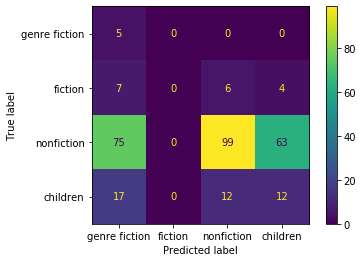

In [166]:
nb_cm = confusion_matrix(y_test, nb_prediction)
nb_disp = ConfusionMatrixDisplay(confusion_matrix=nb_cm, display_labels=['genre fiction', 'fiction', 'nonfiction', 'children'])

nb_disp = nb_disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal')
plt.show()

#### Decision Tree

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [151]:
dtree = DecisionTreeClassifier()
# x,y
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dtree.fit(x_train,y_train)
prediction = dtree.predict(x_test)

print('With Decision tree accuracy is: ',dtree.score(x_test,y_test)) # accuracy

With Decision tree accuracy is:  0.6833333333333333


#### Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [168]:
rf = RandomForestClassifier()
# x,y 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)
rf.fit(x_train,y_train)
prediction = rf.predict(x_test)

print('With Random Forest accuracy is: ', rf.score(x_test,y_test)) # accuracy

With Random Forest accuracy is:  0.78
